In [5]:
import os
import json
import pandas as pd
import numpy as np
from pandas import json_normalize
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [6]:
nltk.download('stopwords')
nltk.download('punkt')
entries = os.listdir('/workspace/tu-feb-2023--mina-ad-mina/src/Deep_Learning/Milestone 3/AAPL')
entries

[nltk_data] Downloading package stopwords to /home/gitpod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/gitpod/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['2014-02-09.json',
 '2014-12-12.json',
 '2014-09-15.json',
 '2014-06-03.json',
 '2015-02-17.json',
 '2016-01-25.json',
 '2016-02-01.json',
 '2014-05-28.json',
 '2015-09-24.json',
 '2015-03-19.json',
 '2015-08-06.json',
 '2014-02-28.json',
 '2015-04-05.json',
 '2016-01-04.json',
 '2015-11-25.json',
 '2014-01-20.json',
 '2016-03-27.json',
 '2014-11-03.json',
 '2014-02-17.json',
 '2015-01-22.json',
 '2015-11-11.json',
 '2014-05-01.json',
 '2015-03-04.json',
 '2014-08-29.json',
 '2015-05-06.json',
 '2015-03-27.json',
 '2016-01-09.json',
 '2014-05-31.json',
 '2015-10-15.json',
 '2014-01-11.json',
 '2015-12-26.json',
 '2014-01-04.json',
 '2015-10-26.json',
 '2014-10-31.json',
 '2014-03-28.json',
 '2016-02-10.json',
 '2014-10-23.json',
 '2014-02-22.json',
 '2014-10-21.json',
 '2014-02-03.json',
 '2015-11-01.json',
 '2014-07-19.json',
 '2015-05-27.json',
 '2014-12-23.json',
 '2014-05-12.json',
 '2014-05-18.json',
 '2015-05-07.json',
 '2014-04-11.json',
 '2014-05-22.json',
 '2015-07-04.json',


In [7]:
apple_tweets = pd.DataFrame()
all_dfs = []
for entry in entries:
    with open(f'/workspace/tu-feb-2023--mina-ad-mina/src/Deep_Learning/Milestone 3/AAPL/{entry}') as f:
        lines = f.readlines()
        data = [json_normalize(json.loads(line.split('\n')[0])) for line in lines]
        df1 = pd.concat(data)
        all_dfs.append(df1)
apple_tweets = pd.concat(all_dfs)

In [8]:
class PreProcessor:
    '''
    Easily performs all the standard preprocessing steps
    like removing stopwords, stemming, etc.
    Only input that you need to provide is the dataframe and column name for the tweets
    '''
    def __init__(self, df, column_name):
        self.data = df
        self.conversations = list(self.data[column_name])
        self.stopwords = set(stopwords.words('english'))
        self.stemmer = SnowballStemmer("english")
        self.preprocessed = []
        
    def tokenize(self, sentence):
        '''
        Splits up words and makes a list of all words in the tweet
        '''
        tokenized_sentence = word_tokenize(sentence)
        return tokenized_sentence
            
    def remove_stopwords(self, sentence):
        '''Removes stopwords like 'a', 'the', 'and', etc.'''
        filtered_sentence = []
        for w in sentence:
            if w not in self.stopwords and len(w) > 1 and w[:2] != '//' and w != 'https': 
                filtered_sentence.append(w)
        return filtered_sentence
    
    def stem(self, sentence):
        '''
        Stems certain words to their root form.
        For example, words like 'computer', 'computation'
        all get truncated to 'comput'
        '''
        return [self.stemmer.stem(word) for word in sentence]
    
    def join_to_string(self, sentence):
        '''
        Joins the tokenized words to one string.
        '''
        return ' '.join(sentence)
    
    def full_preprocess(self, n_rows=None):
        '''
        Preprocess a selected number of rows and
        connects them back to strings
        '''
        # If nothing is given do it for the whole dataset
        if n_rows == None:
            n_rows = len(self.data)
            
        # Perform preprocessing
        for i in range(n_rows):
            tweet = self.conversations[i]
            tokenized = self.tokenize(tweet)
            cleaned = self.remove_stopwords(tokenized)
            stemmed = self.stem(cleaned)
            joined = self.join_to_string(stemmed)
            self.preprocessed.append(joined)
        return self.preprocessed

In [9]:
# Preprocess text and put it in a new column
preprocessor = PreProcessor(apple_tweets, 'text')
apple_tweets['cleaned_text'] = preprocessor.full_preprocess()
apple_tweets.head()

/tmp/ipykernel_1142/3637825965.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  apple_tweets['cleaned_text'] = preprocessor.full_preprocess()


,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,retweeted_status.geo.type,retweeted_status.geo.coordinates,retweeted_status.coordinates.type,retweeted_status.coordinates.coordinates,quoted_status.entities.trends,retweeted_status.place.contained_within,quoted_status.quoted_status_id,quoted_status.quoted_status_id_str,retweeted_status.scopes.followers,cleaned_text
0,Sun Feb 09 04:26:56 +0000 2014,432370004005494784,432370004005494784,RT @JeffMacke: 3 reasons Apple's commie buybac...,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rt jeffmack reason appl 's commi buyback polic...
0,Sun Feb 09 17:06:33 +0000 2014,432561167832064001,432561167832064001,Account doubling system Sign up FREE for a wee...,web,False,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,account doubl system sign free week http fb aapl
0,Sun Feb 09 11:42:20 +0000 2014,432479576023785472,432479576023785472,Is it breakout time on $NEBS $CLGX $AYR $AAPL...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,is breakout time neb clgx ayr aapl view http
0,Sun Feb 09 07:28:26 +0000 2014,432415679992451072,432415679992451072,$AAPL Apple Inc. (AAPL) news: 2014 Will Be The...,"<a href=""http://dlvr.it"" rel=""nofollow"">dlvr.i...",False,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aapl appl inc. aapl news 2014 will be the tip ...
0,Sun Feb 09 11:10:09 +0000 2014,432471476827340800,432471476827340800,RT @WalkerDellaport: Trades produce 100% same ...,web,False,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rt walkerdellaport trade produc 100 day tri fr...


In [38]:
apple_tweets['created_at'] = pd.to_datetime(apple_tweets['created_at'])
apple_tweets = apple_tweets[['created_at', 'text', 'cleaned_text']]
apple_tweets.head()

/tmp/ipykernel_1142/1321986403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_tweets['created_at'] = pd.to_datetime(apple_tweets['created_at'])


,created_at,text,cleaned_text
0,2014-02-09,RT @JeffMacke: 3 reasons Apple's commie buybac...,rt jeffmack reason appl 's commi buyback polic...
0,2014-02-09,Account doubling system Sign up FREE for a wee...,account doubl system sign free week http fb aapl
0,2014-02-09,Is it breakout time on $NEBS $CLGX $AYR $AAPL...,is breakout time neb clgx ayr aapl view http
0,2014-02-09,$AAPL Apple Inc. (AAPL) news: 2014 Will Be The...,aapl appl inc. aapl news 2014 will be the tip ...
0,2014-02-09,RT @WalkerDellaport: Trades produce 100% same ...,rt walkerdellaport trade produc 100 day tri fr...


In [19]:
directory = "/workspace/tu-feb-2023--mina-ad-mina/src/Deep_Learning/Milestone 3/AAPL.csv"
# First, we get the data

df = pd.read_csv(directory, index_col='Date', parse_dates=['Date'])
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-09-04,95.108574,96.448570,94.928574,96.424286,87.121140,91973000
1,2012-09-05,96.510002,96.621429,95.657143,95.747147,86.509338,84093800
2,2012-09-06,96.167145,96.898575,95.828575,96.610001,87.288956,97799100
3,2012-09-07,96.864288,97.497147,96.538574,97.205711,87.827171,82416600
4,2012-09-10,97.207146,97.612854,94.585716,94.677139,85.542564,121999500


In [20]:
# # Convert the 'created_at' column in the tweets dataframe to datetime format
apple_tweets['created_at'] = pd.to_datetime(apple_tweets['created_at'], utc=True).dt.date

# # Convert the 'Date' column in the stocks dataframe to datetime format
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.date
merged_df = pd.merge(apple_tweets, df, left_on='created_at', right_on='Date')
# merged_df['price_change'] = merged_df['Close'] - merged_df['Open']
# merged_df.drop('Date', axis=1, inplace=True)
merged_df.head()

/tmp/ipykernel_1142/622898925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_tweets['created_at'] = pd.to_datetime(apple_tweets['created_at'], utc=True).dt.date


,created_at,text,cleaned_text,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-11,Whats going on with $AKAM $SNDK $OIS $AAPL Cli...,what go akam sndk oi aapl click http,2014-12-11,112.260002,113.800003,111.339996,111.620003,106.042046,41401700
1,2014-12-11,#Stocks to hold onto $SLAB $HTZ $NTRS $AAPL #p...,stock hold onto slab htz ntrs aapl personalfin...,2014-12-11,112.260002,113.800003,111.339996,111.620003,106.042046,41401700
2,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,2014-12-11,112.260002,113.800003,111.339996,111.620003,106.042046,41401700
3,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,2014-12-11,112.260002,113.800003,111.339996,111.620003,106.042046,41401700
4,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,2014-12-11,112.260002,113.800003,111.339996,111.620003,106.042046,41401700


In [21]:
merged_df['price_change'] = merged_df['Close'] - merged_df['Open']
merged_df.drop('Date', axis=1, inplace=True)
merged_df.head()

,created_at,text,cleaned_text,Open,High,Low,Close,Adj Close,Volume,price_change
0,2014-12-11,Whats going on with $AKAM $SNDK $OIS $AAPL Cli...,what go akam sndk oi aapl click http,112.260002,113.800003,111.339996,111.620003,106.042046,41401700,-0.639999
1,2014-12-11,#Stocks to hold onto $SLAB $HTZ $NTRS $AAPL #p...,stock hold onto slab htz ntrs aapl personalfin...,112.260002,113.800003,111.339996,111.620003,106.042046,41401700,-0.639999
2,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,113.800003,111.339996,111.620003,106.042046,41401700,-0.639999
3,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,113.800003,111.339996,111.620003,106.042046,41401700,-0.639999
4,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,113.800003,111.339996,111.620003,106.042046,41401700,-0.639999


In [22]:
merged_df.drop(columns=['High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
merged_df.head()

,created_at,text,cleaned_text,Open,Close,price_change
0,2014-12-11,Whats going on with $AKAM $SNDK $OIS $AAPL Cli...,what go akam sndk oi aapl click http,112.260002,111.620003,-0.639999
1,2014-12-11,#Stocks to hold onto $SLAB $HTZ $NTRS $AAPL #p...,stock hold onto slab htz ntrs aapl personalfin...,112.260002,111.620003,-0.639999
2,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,111.620003,-0.639999
3,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,111.620003,-0.639999
4,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,111.620003,-0.639999


In [23]:
training_set_size = int(len(df)*.8)
training_set = merged_df.iloc[:training_set_size,-1:].values
test_set = merged_df.iloc[training_set_size:,-1:].values

In [24]:
import nltk
nltk.download('vader_lexicon')  # download the pre-built sentiment lexicon

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/gitpod/nltk_data...


In [39]:
scores = []
for ind in merged_df.index:
    scores.append(analyzer.polarity_scores(merged_df['cleaned_text'][ind])['compound'])

In [26]:
merged_df['sentiment_scores'] = scores
merged_df.head()

,created_at,text,cleaned_text,Open,Close,price_change,sentiment_scores
0,2014-12-11,Whats going on with $AKAM $SNDK $OIS $AAPL Cli...,what go akam sndk oi aapl click http,112.260002,111.620003,-0.639999,0.0000
1,2014-12-11,#Stocks to hold onto $SLAB $HTZ $NTRS $AAPL #p...,stock hold onto slab htz ntrs aapl personalfin...,112.260002,111.620003,-0.639999,0.0000
2,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,111.620003,-0.639999,0.2023
3,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,111.620003,-0.639999,0.2023
4,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,111.620003,-0.639999,0.2023


In [27]:
merged_df['price_increase'] = merged_df['price_change'] > 0
merged_df['pred_price_increase'] = merged_df['sentiment_scores'] >= 0
merged_df.head(10)

,created_at,text,cleaned_text,Open,Close,price_change,sentiment_scores,price_increase,pred_price_increase
0,2014-12-11,Whats going on with $AKAM $SNDK $OIS $AAPL Cli...,what go akam sndk oi aapl click http,112.260002,111.620003,-0.639999,0.0000,False,True
1,2014-12-11,#Stocks to hold onto $SLAB $HTZ $NTRS $AAPL #p...,stock hold onto slab htz ntrs aapl personalfin...,112.260002,111.620003,-0.639999,0.0000,False,True
2,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,111.620003,-0.639999,0.2023,False,True
3,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,111.620003,-0.639999,0.2023,False,True
4,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,111.620003,-0.639999,0.2023,False,True
5,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,111.620003,-0.639999,0.2023,False,True
6,2014-12-11,RT @greatspoke: Top Stock Options Analyst Deta...,rt greatspok top stock option analyst detail p...,112.260002,111.620003,-0.639999,0.2023,False,True
7,2014-12-11,RT @greatspoke: Top Stock Options Analyst Deta...,rt greatspok top stock option analyst detail p...,112.260002,111.620003,-0.639999,0.2023,False,True
8,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,111.620003,-0.639999,0.2023,False,True
9,2014-12-11,RT @greatspoke: Top Stock Analyst Pick List De...,rt greatspok top stock analyst pick list detai...,112.260002,111.620003,-0.639999,0.2023,False,True


In [46]:
grouped_df = merged_df.groupby('created_at').agg({'price_change': 'first', 'sentiment_scores': 'sum'}).reset_index()
grouped_df['price_increase'] = grouped_df['price_change']>0
grouped_df['pred_price_increase'] = grouped_df['sentiment_scores']>0
grouped_df.head(15)

,created_at,price_change,sentiment_scores,price_increase,pred_price_increase
0,2013-12-31,0.978569,0.0000,True,False
1,2014-01-02,-0.364288,8.1494,False,True
2,2014-01-03,-1.697143,2.9987,False,True
3,2014-01-06,0.925713,2.4804,True,True
4,2014-01-07,-0.611427,7.1362,False,True
5,2014-01-08,0.664291,2.0650,True,True
6,2014-01-09,-1.468574,0.4382,False,True
7,2014-01-10,-0.984283,2.0445,False,True
8,2014-01-13,0.831429,1.6080,True,True
9,2014-01-14,1.167144,1.6381,True,True


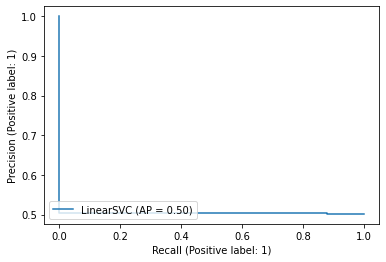

In [42]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_predictions(grouped_df['price_increase'], grouped_df['pred_price_increase'], name="LinearSVC")

In [43]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(grouped_df['price_increase'], grouped_df['pred_price_increase'])
roc_auc = metrics.auc(fpr, tpr)

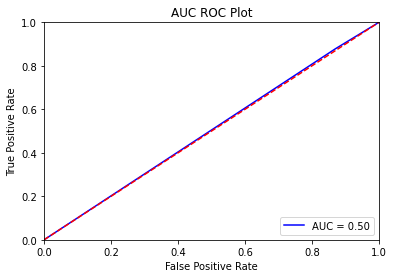

In [44]:
# AUC ROC Plot
plt.title('AUC ROC Plot')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

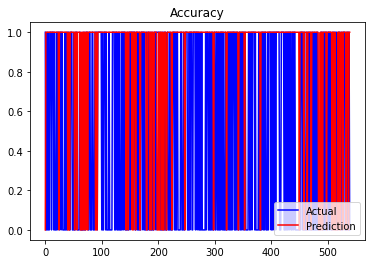

In [45]:
# Accuracy Plot
f1 = plt.figure()
plt.title('Accuracy')
plt.plot(grouped_df['price_increase'], 'b', label = 'Actual')
plt.plot(grouped_df['pred_price_increase'], 'r', label = 'Prediction')

plt.legend(loc = 'lower right')
plt.show()